In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('./dataset-3clusters.csv')
x_train = dataset.iloc[:].values

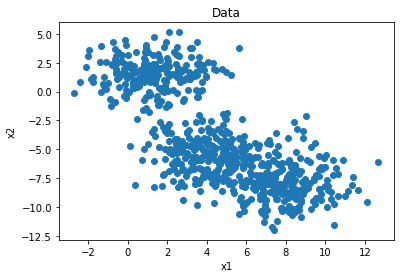

In [3]:
x1, x2 = x_train[:, 0], x_train[:, 1]
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

In [4]:
class KMeans():
    def __init__(self, K):
        if (K <= 0):
            raise ValueError('K has to be greater than zero')
        
        self.K = K
        self.centroids = None  # centroids of the clusters (the index is the cluster number)
        self.assignments = None
        self.assignments_prev = None
        self.num_iter = 0
    
    def __str__(self):
        return 'Centroids:\n{}'.format(self.centroids)

    def fit(self, x_train):
        def distance_sq(a, b):
            return np.sum((a - b) ** 2)

        def mean_vec(xs):
            return (1 / len(xs)) * np.sum(xs, axis=0)

        def assign_cluster(x):
            return np.argmin([distance_sq(x, u) for u in self.centroids])

        def new_centroid(k):
            x_indices = np.where(self.assignments == k)[0]  # indices of data pts that are assigned to cluster 'k'
            xs = np.take(x_train, x_indices, axis=0)
            if (len(xs) == 0):
                return x_train[np.random.randint(0, len(x_train))]
            return mean_vec(xs)
        
        # K-means Algorithm:
        self.centroids = np.array([ x_train[i] for i in np.random.randint(0, len(x_train), size=self.K) ])  # random init step
        plot_clusters(self, x_train, 'K-means model before fitting')
        print(self)
        
        self.assignments = np.array([ assign_cluster(x) for x in x_train ])  # cluster assignment step
        while not np.array_equal(self.assignments, self.assignments_prev):
            self.assignments_prev = self.assignments.copy()
            self.centroids = np.array([ new_centroid(k) for k in np.arange(0, self.K) ])  # move centroid step
            self.assignments = np.array([ assign_cluster(x) for x in x_train ])  # cluster assignment step
            self.num_iter += 1
        
        print('Converged in {} iterations'.format(self.num_iter))

In [5]:
def plot_clusters(cluster_model, X_set, title, xlabel='x1', ylabel='x2'):
    x1, x2 = X_set[:, 0], X_set[:, 1]
    plt.scatter(x1, x2, c=cluster_model.assignments)
    for u in cluster_model.centroids:
        plt.scatter(u[0], u[1], c='black', s=200, marker='X')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [6]:
means3 = KMeans(3)

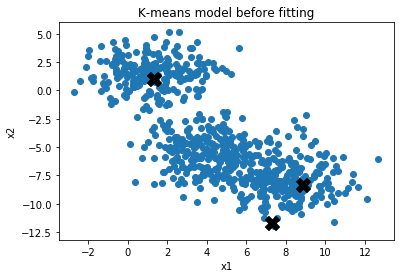

Centroids:
[[  7.32455374 -11.69402803]
 [  8.887       -8.37513281]
 [  1.33529873   1.00058637]]
Converged in 8 iterations
Centroids:
[[ 7.97151655 -8.01646939]
 [ 4.04062966 -5.41965912]
 [ 1.30319097  1.53281507]]


In [7]:
means3.fit(x_train)
print(means3)

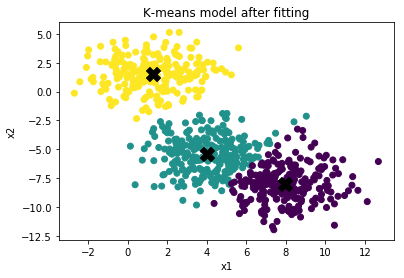

In [8]:
plot_clusters(means3, x_train, 'K-means model after fitting')